In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Project Introduction**

The Indian education landscape has been undergoing rapid changes for the past 10 years owing to the advancement of web-based learning services, specifically, eLearning platforms. Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market is growing on a rapid scale, there are major challenges associated with digital learning when compared with brick and mortar classrooms. One of many challenges is how to ensure quality learning for students. 

Digital platforms might overpower physical classrooms in terms of content quality but when it comes to understanding whether students are able to grasp the content in a live class scenario is yet an open-end challenge. In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who need special attention. Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the mood. Because of this drawback, students are not focusing on content due to lack of surveillance.

While digital platforms have limitations in terms of physical surveillance but it comes with the power of data and machines
which can work for you. It provides data in the form of video, audio, and texts which can be analysed using deep learning algorithms. Deep learning backed system not only solves the surveillance issue, but it also removes the human bias from the system, and all information is no longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.I will solve the above-mentioned challenge by applying deep learning algorithms to live video data. The solution to this problem is by recognizing facial emotions.


#  **Importing Libraries for CNN model**

In [1]:
#Importing Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

#Deep Learning 
import tensorflow as tf
from keras.preprocessing.image import img_to_array,load_img,ImageDataGenerator
from keras.layers import Dense,Input,Dropout, GlobalAveragePooling2D,Flatten,Conv2D, BatchNormalization,Activation,MaxPooling2D
from keras.models import load_model,Model,Sequential
from keras.optimizers import Adam,SGD, RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# **Displaying Images of happy**

In [9]:
pic_size = 48
folder_path ="../input/face-expression-recognition-dataset/images/"

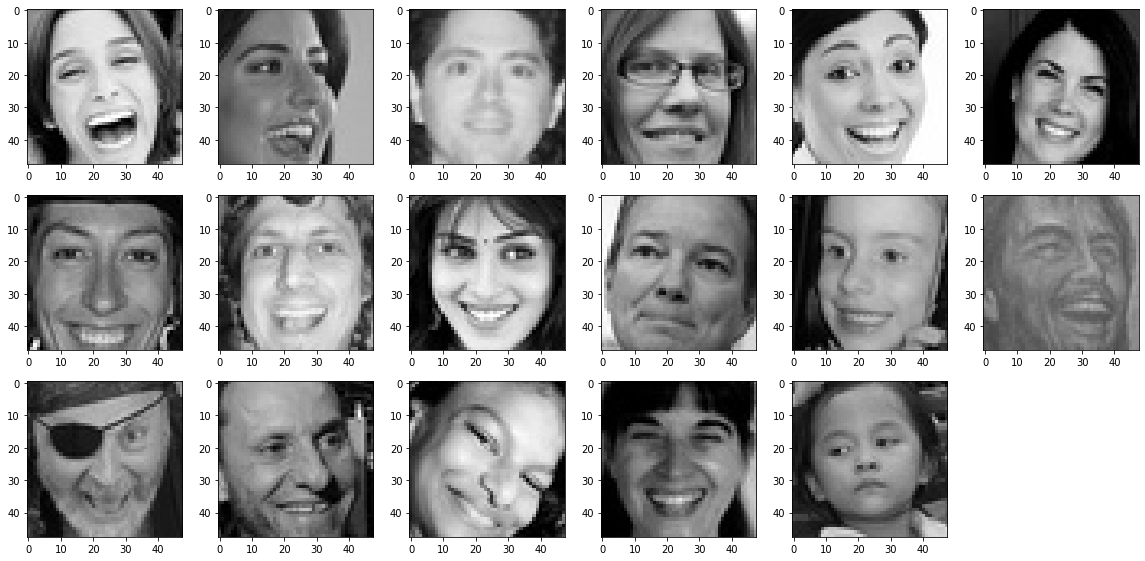

In [11]:
expression='happy'

plt.figure(figsize=(20,20))
for i in range(1,18,1):
    plt.subplot(6,6,i)
    img=load_img(folder_path+'train/'+expression+"/"+
                os.listdir(folder_path + 'train/' + expression)[i],target_size=(pic_size,pic_size))
    plt.imshow(img)
plt.show()

# **Making Training and Validation set**

In [12]:
batch_size=128


# Let's use some data augmentaiton
datagen_train= ImageDataGenerator(rescale = 1.0/255.0,
                                  width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 20,
                                   horizontal_flip = True)
datagen_val = ImageDataGenerator(rescale= 1.0/255)

train_set = datagen_train.flow_from_directory(folder_path+'train',target_size=(pic_size,pic_size),color_mode='grayscale',
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)

test_set= datagen_val.flow_from_directory(folder_path+'validation',
                                            target_size=(pic_size,pic_size),
                                            color_mode='grayscale',
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# **Applied Sequential Model of 4 convolutions and 2 Fully connected layers**

# **How many parameters are available at each layers?**

In [13]:

no_of_classes=7
model=Sequential()

#1st CNN Layer
model.add(Conv2D(64,(3,3),padding='same', input_shape=(48,48,1)) )
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#2nd CNN Layer
model.add(Conv2D(128,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.25))

#3rd CNN Layer
model.add(Conv2D(512,(3,3), padding=('same')))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4th CNN Layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#fully connected 1st Layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#Fully connected 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))


opt=Adam(lr=.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

# **Model Fitting and Check Points to save the model best weights**

In [14]:
# number of epochs to train the NN
epochs = 150

# checkpoint to save best model
from keras.callbacks import ModelCheckpoint

checkpoint=ModelCheckpoint(filepath='./modelbestweights.h5', mode='max', monitor='val_accuracy', verbose=1, save_best_only=True)



callbacks_list=[checkpoint]


model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=.001),metrics=['accuracy'])

In [16]:
history=model.fit(train_set,
                           steps_per_epoch=train_set.n//train_set.batch_size,
                           epochs=epochs,
                           validation_data=test_set,
                           validation_steps=test_set.n//test_set.batch_size,
                           callbacks=callbacks_list)

Epoch 1/150
225/225 [==============================] - 114s 508ms/step - loss: 1.7460 - accuracy: 0.3078 - val_loss: 1.9387 - val_accuracy: 0.2482

Epoch 00001: val_accuracy improved from -inf to 0.24815, saving model to ./modelbestweights.h5
Epoch 2/150
225/225 [==============================] - 38s 169ms/step - loss: 1.5345 - accuracy: 0.4052 - val_loss: 1.7281 - val_accuracy: 0.3608

Epoch 00002: val_accuracy improved from 0.24815 to 0.36080, saving model to ./modelbestweights.h5
Epoch 3/150
225/225 [==============================] - 36s 162ms/step - loss: 1.4022 - accuracy: 0.4620 - val_loss: 1.3315 - val_accuracy: 0.4903

Epoch 00003: val_accuracy improved from 0.36080 to 0.49034, saving model to ./modelbestweights.h5
Epoch 4/150
225/225 [==============================] - 37s 166ms/step - loss: 1.3289 - accuracy: 0.4876 - val_loss: 1.2418 - val_accuracy: 0.5277

Epoch 00004: val_accuracy improved from 0.49034 to 0.52770, saving model to ./modelbestweights.h5
Epoch 5/150
225/225 [=

# **Plotting Accuracy and Loss**

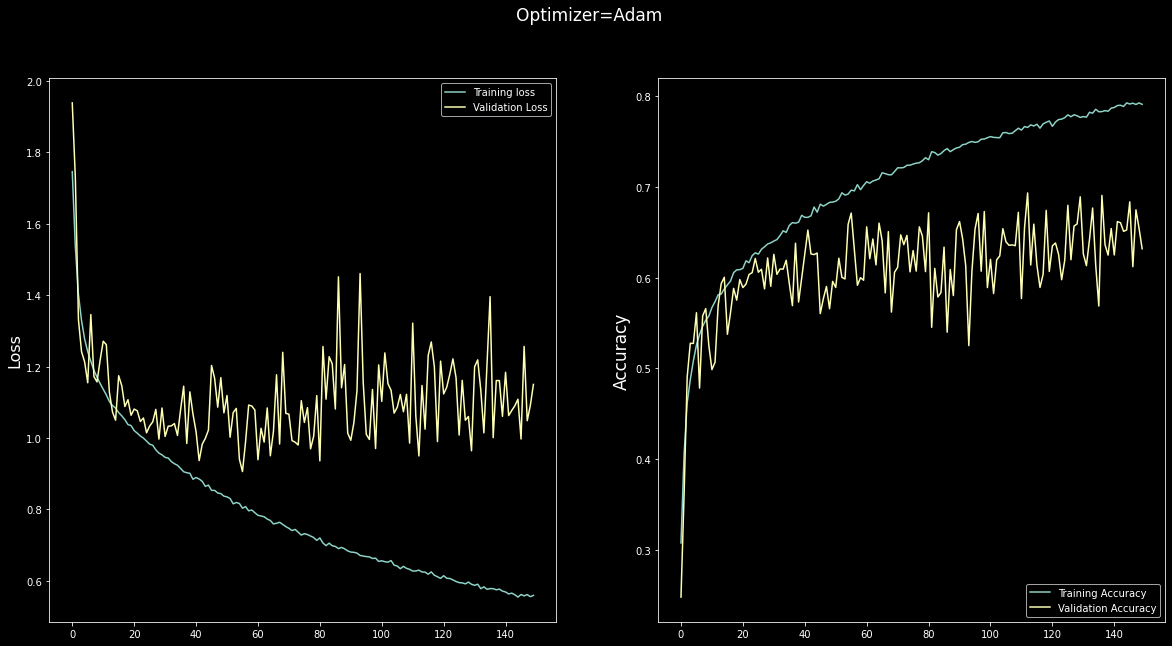

In [18]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.suptitle('Optimizer=Adam', fontsize=17)
plt.ylabel('Loss',fontsize=16)
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.ylabel('Accuracy', fontsize=17)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **Summary**

* I used CNN sequential model with 4 Convolution Layers with relu as activation function and 2 Fully connected layers passed through softmax function
* I initially got a validation accuracy around 64% with batch size 64, and epochs 50.
* By Hyper tunning the model to 128 batch size, Epochs =150 with Adaptive learning rate = 0.0001 reach validation accuracy of 69% at 137 Epoch.
* model which is saved by best weights and highest accuracy is used for deployment

In [ ]:
# model.save("./model_path/my_model.h5")